<a href="https://colab.research.google.com/github/hrishigadkari/ML-Projects/blob/master/Titanic-Survival-Prediction/Titanic_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Titanic Survival Prediction: ML from Disaster

### Defining the problem statement

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we were asked to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

![alt text](https://faithmag.com/sites/default/files/styles/article_full/public/2018-09/titanic2.jpg?h=6521bd5e&itok=H8td6QVv)


## Predict Survival on the titanic

1. Data Summary
2. Exploratory Data Analysis
3. Feature Engineering
4. Feature Selection
5. Prediction
6. Hyperparameter Tuning
7. Model Evaluation
8. Deployment.

In [ ]:
#To initialize this project, we use the following libraries such as pandas to read and understand the data, numpyto perform computation
#sklearn for ML modelling and matplotlib, seaborn for plotting
import pandas as pd
import numpy as np
import pandas as pd
import sklearn 
%matplotlib inline
import matplotlib.pyplot as plt
import os
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Importing os so as to read the file
import os
for dirname, _, filenames in os.walk('/titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
#There are a total of three files named train, test and gender submission
train_titanic = pd.read_csv('train.csv')
test_titanic = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [ ]:
#Printing the total rows and columns for the train dataset to calculate the next steps for the EDA.
print("The shape is \n " , train_titanic.shape)

The shape is 
  (891, 12)


In [ ]:
#Printing the first 10 rows of the dataset
print("Top 10 rows of the dataset\n")
train_titanic.head(10)

Top 10 rows of the dataset



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
#The info function of pandas is used for printing the summary of the dataframe that gives 
#index dtype and column dtypes, non-null values and memory usage.
#We can observe that there are null values for the Age, Cabin and Embarked column
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Printing the statictical summary of the dataset.
print("The description of the dataset\n")
train_titanic.describe()

The description of the dataset



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Printing the summary of the "test" dataset and figuring out the null values
test_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
#Similiar to the "train" dataset, we are printing the first 10 values of the "test" dataset to compare with the train dataset
test_titanic.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
#Replacing the null values of the age column with the mean of the entire "Age" column
mean_age=train_titanic['Age'].mean()
age=int(mean_age)
train_titanic['Age'].fillna(age,inplace=True)

In [ ]:
#To test whether the null values have been replaced with the mean by printing the .info function
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Replacing the null values of the age column with the mean of the entire "Age" column
mean_age_t=test_titanic['Age'].mean()
age_test=int(mean_age_t)
test_titanic['Age'].fillna(age_test,inplace=True)

In [ ]:
#Similiar to the train dataset, we can test whether the null values have been replaced with the mean by printing the .info function.
test_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
#We are filling the null values of the cabin and embarked of the datasets by replacing it with an unknown value
train_titanic['Cabin'].fillna('Unknown',inplace=True)
test_titanic['Cabin'].fillna('Unknown',inplace=True)
train_titanic['Embarked'].fillna('Unknown',inplace=True)


In [ ]:
#Creating a dictionary to find out the total number of survivors
rate_survival = { 'count_survived': [0], 'count_not_survived': [0], 'Total': [0]}

In [ ]:
#Printing the total number of survivors in the survived column, where 0 represents death count and 1 represents the survived count
train_titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
#Incrementing the dictionary by counting the amount of survivors
rate_survival['count_survived'] = train_titanic.Survived.value_counts() [1]
rate_survival['count_not_survived'] = train_titanic.Survived.value_counts() [0]
rate_survival['Total'] = rate_survival['count_survived'] + rate_survival['count_not_survived']

In [ ]:
#Creating a column name, mention what is rate of survival
index_for_the_updated_survival_count = ['rate_survival']

In [ ]:
#The overview of the survivors, graph add here
Survival=pd.DataFrame([rate_survival])
Survival.index = index_for_the_updated_survival_count
Survival.transpose()

,rate_survival
count_survived,342
count_not_survived,549
Total,891


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb705704668>,
      dtype=object)

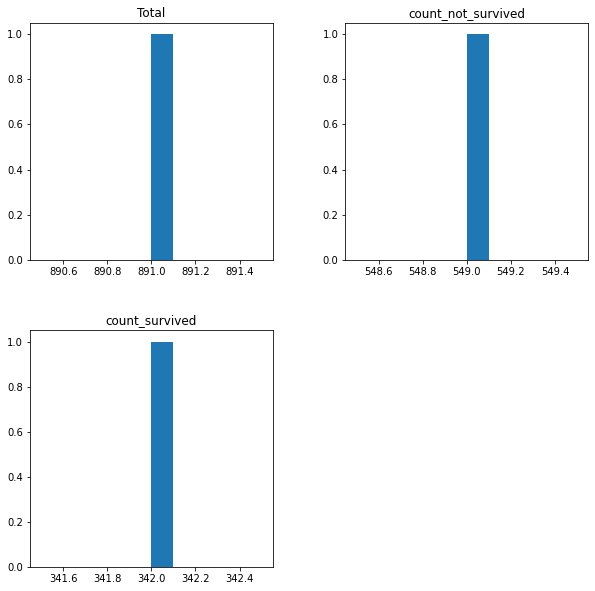

In [ ]:
#plotting the survivors in the bar chart, use seaborn/mat[plot] for a better graph

Survival.hist(figsize=(10,10),grid=False)

In [ ]:
#Since there are 3 different categories, of the passengers boarding the ship [S,C,Q], we have divided them into digits for easier EDA
train_titanic['Embarked'] = train_titanic['Embarked'].map({'S': 1, 'C': 2, 'Q': 3,'Unknown':0} ).astype(int)

In [ ]:
train_titanic['Embarked']

0      1
1      2
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    2
890    3
Name: Embarked, Length: 891, dtype: int64

In [ ]:
#Finally our train dataset will be free of null values, markdown text required to explain why we used info
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [ ]:
#Same for the test dataset
test_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
#Listing most related continious values to target.
train_corr = train_titanic[['Survived', 'Age', 'Fare'
                      ]].corr(method='spearman').abs().unstack().sort_values(
                          kind='quicksort', ascending=False).reset_index()
train_corr.rename(columns={
    'level_0': 'Feature A',
    'level_1': 'Feature B',
    0: 'Correlation Coefficient'
},
                  inplace=True)
train_corr[(train_corr['Feature A'] == 'Survived')].style.background_gradient(

    cmap='summer_r')

,Feature A,Feature B,Correlation Coefficient
2,Survived,Survived,1.000000
4,Survived,Fare,0.323736
8,Survived,Age,0.037472


In [ ]:
#The next part of the EDA is to divide the survivors into the category from which they have embarked to find out the survival rate
s_count = {'Not_Survived':[0],
          'Survived':[0]}
sf_count = {'Not_Survived':[0],
          'Survived':[0]}
c_count = {'Not_Survived':[0],
          'Survived':[0]}
cf_count = {'Not_Survived':[0],
          'Survived':[0]}
q_count = {'Not_Survived':[0],
          'Survived':[0]}
qf_count = {'Not_Survived':[0],
          'Survived':[0]}


In [ ]:
s_count['Not_Survived'] = train_titanic.loc[(train_titanic['Sex']=='male') & (train_titanic['Embarked']==1),'Survived'].value_counts()[1]
s_count['Survived'] = train_titanic.loc[(train_titanic['Sex']=='male') & (train_titanic['Embarked']==1),'Survived'].value_counts()[0]
#Create the index 
index_ = ['Male passengers : Embarked S'] 
# Set the index 
male_S=pd.DataFrame([s_count])
male_S.index = index_ 
#male_S.transpose()
#male_S
sf_count['Not_Survived'] = train_titanic.loc[(train_titanic['Sex']=='female') & (train_titanic['Embarked']==1),'Survived'].value_counts()[0]
sf_count['Survived'] = train_titanic.loc[(train_titanic['Sex']=='female') & (train_titanic['Embarked']==1),'Survived'].value_counts()[1]
#Create the index 
index_ = ['Female passengers : Embarked S'] 
# Set the index 
female_S=pd.DataFrame([sf_count])
female_S.index = index_

In [ ]:
c_count['Not_Survived'] = train_titanic.loc[(train_titanic['Sex']=='male') & (train_titanic['Embarked']==2),'Survived'].value_counts()[0]
c_count['Survived'] = train_titanic.loc[(train_titanic['Sex']=='male') & (train_titanic['Embarked']==2),'Survived'].value_counts()[1]
#Create the index 
index_ = ['Male passengers : Embarked C'] 
# Set the index 
male_C=pd.DataFrame([c_count])
male_C.index = index_ 
#male_C
cf_count['Not_Survived'] = train_titanic.loc[(train_titanic['Sex']=='female') & (train_titanic['Embarked']==2),'Survived'].value_counts()[0]
cf_count['Survived'] = train_titanic.loc[(train_titanic['Sex']=='female') & (train_titanic['Embarked']==2),'Survived'].value_counts()[1]
#Create the index 
index_ = ['Female passengers : Embarked C'] 
# Set the index 
female_C=pd.DataFrame([cf_count])
female_C.index = index_

In [ ]:
q_count['Not_Survived'] = train_titanic.loc[(train_titanic['Sex']=='male') & (train_titanic['Embarked']==3),'Survived'].value_counts()[0]
q_count['Survived'] = train_titanic.loc[(train_titanic['Sex']=='male') & (train_titanic['Embarked']==3),'Survived'].value_counts()[1]
#Create the index 
index_ = ['Male passengers : Embarked Q'] 
# Set the index 
male_Q=pd.DataFrame([q_count])
male_Q.index = index_ 
#male_Q
qf_count['Not_Survived'] = train_titanic.loc[(train_titanic['Sex']=='female') & (train_titanic['Embarked']==3),'Survived'].value_counts()[0]
qf_count['Survived'] = train_titanic.loc[(train_titanic['Sex']=='female') & (train_titanic['Embarked']==3),'Survived'].value_counts()[1]
#Create the index 
index_ = ['female passengers : Embarked Q'] 
# Set the index 
female_Q=pd.DataFrame([qf_count])
female_Q.index = index_ 

In [ ]:
#male_Q
frames=[male_S,female_S,male_C,female_C,male_Q,female_Q]
result=pd.concat(frames)
Gender_Embarked = pd.DataFrame(result)
Gender_Embarked

,Not_Survived,Survived
Male passengers : Embarked S,77,364
Female passengers : Embarked S,63,140
Male passengers : Embarked C,66,29
Female passengers : Embarked C,9,64
Male passengers : Embarked Q,38,3
female passengers : Embarked Q,9,27


In [ ]:
#This is the total overview of the survivors according to the survivors from the above dictionary
train_titanic['Embarked'].value_counts()

1    644
2    168
3     77
0      2
Name: Embarked, dtype: int64

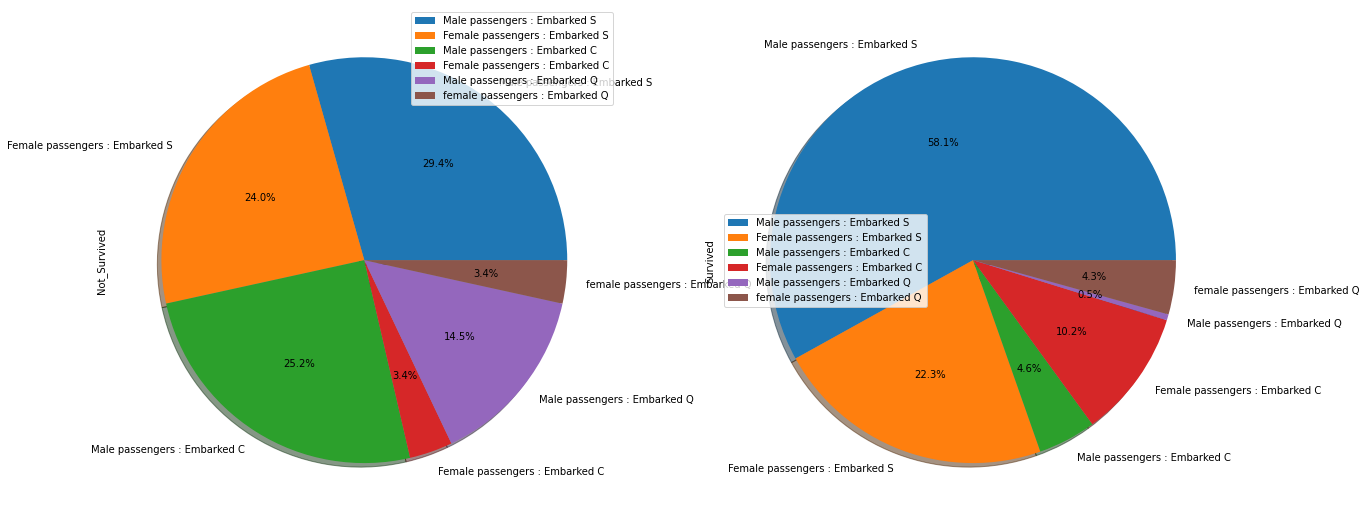

In [ ]:
#Pie chart to demonstrate the embarked distribution
abc = Gender_Embarked.plot.pie(subplots=True,figsize=(20,20), autopct='%1.1f%%',shadow=True)
plt.legend(loc='center left')
plt.show()



In [ ]:
#Similiar to the embarked, we are calculating the survivors based on the class of the ship [1,2,3]
a = {'Not_Survived':[0],
          'Survived':[0]}
b = {'Not_Survived':[0],
          'Survived':[0]}
c = {'Not_Survived':[0],
          'Survived':[0]}
d = {'Not_Survived':[0],
          'Survived':[0]}
e = {'Not_Survived':[0],
          'Survived':[0]}
f = {'Not_Survived':[0],
          'Survived':[0]}


In [ ]:
a=train_titanic.loc[(train_titanic['Sex']=='female') & (train_titanic['Pclass']== 1),'Survived'].value_counts()
#Create the index 
index_ = ['Female passengers : PClass 1'] 
# Set the index 
female_1=pd.DataFrame([a])
female_1.index = index_ 


In [ ]:
b=train_titanic.loc[(train_titanic['Sex']=='female') & (train_titanic['Pclass']== 2),'Survived'].value_counts()
#Create the index 
index_ = ['Female passengers : PClass 2'] 
# Set the index 
female_2=pd.DataFrame([b])
female_2.index = index_ 


In [ ]:
c=train_titanic.loc[(train_titanic['Sex']=='female') & (train_titanic['Pclass']== 3),'Survived'].value_counts()
#Create the index 
index_ = ['Female passengers : PClass 3'] 
# Set the index 
female_3=pd.DataFrame([c])
female_3.index = index_ 

In [ ]:
d=train_titanic.loc[(train_titanic['Sex']=='male') & (train_titanic['Pclass']== 1),'Survived'].value_counts()
#Create the index 
index_ = ['Male passengers : PClass 1'] 
# Set the index 
male_1=pd.DataFrame([d])
male_1.index = index_ 

In [ ]:
e=train_titanic.loc[(train_titanic['Sex']=='male') & (train_titanic['Pclass']== 2),'Survived'].value_counts()
#Create the index 
index_ = ['Male passengers : PClass 2'] 
# Set the index 
male_2=pd.DataFrame([e])
male_2.index = index_ 


In [ ]:
f=train_titanic.loc[(train_titanic['Sex']=='male') & (train_titanic['Pclass']== 3),'Survived'].value_counts()
#Create the index 
index_ = ['Male passengers : PClass 3'] 
# Set the index 
male_3=pd.DataFrame([f])
male_3.index = index_ 

In [ ]:
frames=[male_1,female_1,male_2,female_2,male_1,female_2,male_3,female_3]
result=pd.concat(frames)
Gender_PClass = pd.DataFrame(result)
Gender_PClass


,0,1
Male passengers : PClass 1,77,45
Female passengers : PClass 1,3,91
Male passengers : PClass 2,91,17
Female passengers : PClass 2,6,70
Male passengers : PClass 1,77,45
Female passengers : PClass 2,6,70
Male passengers : PClass 3,300,47
Female passengers : PClass 3,72,72


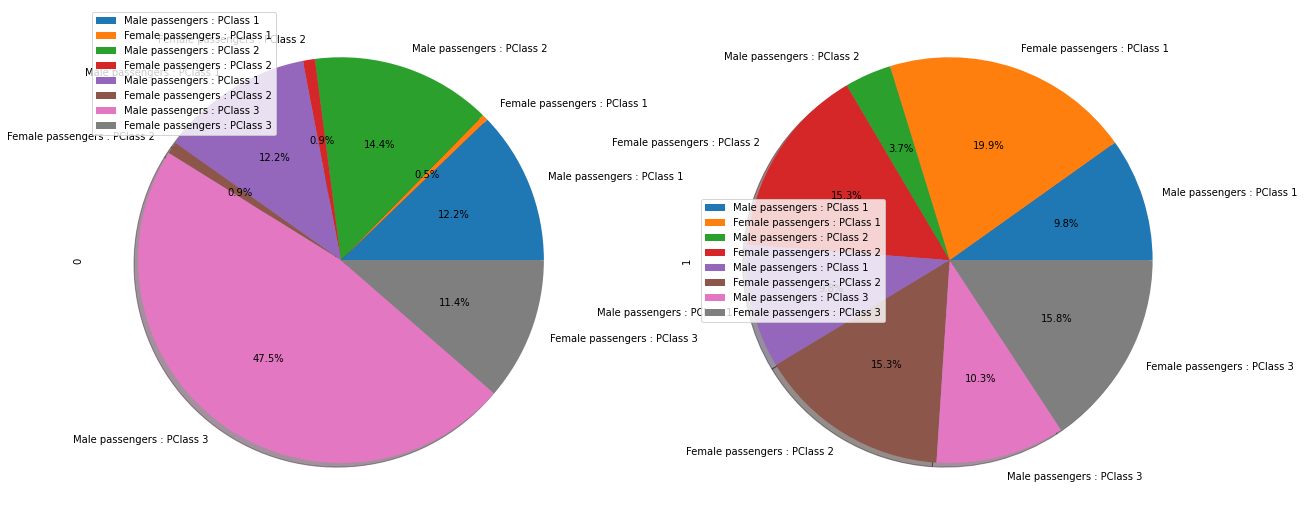

In [ ]:
#Pie chart for the Pclass survivors
ax2 = Gender_PClass.plot.pie(subplots=True,figsize=(20,20), autopct='%1.1f%%',shadow=True)
plt.legend(loc='center left')
plt.show()


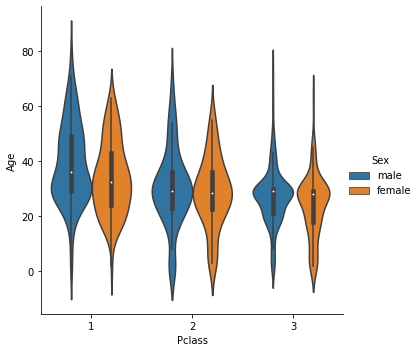

In [ ]:
#Violin plot of the survivors based on the and Pclass
g = sns.catplot(x="Pclass", y="Age", hue="Sex",
               data=train_titanic, kind="violin")

# Feature Engineering

In [ ]:
train_titanic['age_bins'] = pd.cut(x=train_titanic['Age'], bins=8, labels=False, retbins=False, include_lowest=True)
test_titanic['age_bins'] = pd.cut(x=test_titanic['Age'], bins=8, labels=False, retbins=False, include_lowest=True)
train_titanic['age_bins'].value_counts()


2    407
3    155
1    115
4     86
0     64
5     42
6     17
7      5
Name: age_bins, dtype: int64

Text(0, 0.5, 'Count')

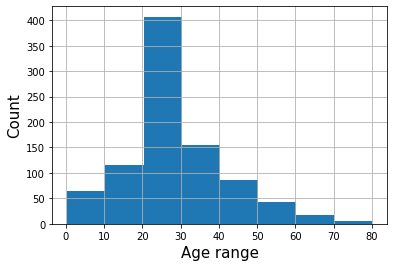

In [ ]:
train_titanic['Age'].hist(bins=8,grid=True)
plt.xlabel("Age range", fontsize=15)
plt.ylabel("Count",fontsize=15)



In [ ]:
train_titanic['Fare_cat']=0
train_titanic.loc[train_titanic['Fare']<=7.91,'Fare_cat']=0
train_titanic.loc[(train_titanic['Fare']>7.91)&(train_titanic['Fare']<=14.454),'Fare_cat']=1
train_titanic.loc[(train_titanic['Fare']>14.454)&(train_titanic['Fare']<=31),'Fare_cat']=2
train_titanic.loc[(train_titanic['Fare']>31)&(train_titanic['Fare']<=93.5),'Fare_cat']=3
train_titanic.loc[(train_titanic['Fare']>93.5)&(train_titanic['Fare']<=164.8667),'Fare_cat']=4
train_titanic.loc[(train_titanic['Fare']>164.8667)&(train_titanic['Fare']<=512.3292),'Fare_cat']=5

test_titanic['Fare_cat']=0
test_titanic.loc[test_titanic['Fare']<=7.91,'Fare_cat']=0
test_titanic.loc[(test_titanic['Fare']>7.91)&(test_titanic['Fare']<=14.454),'Fare_cat']=1
test_titanic.loc[(test_titanic['Fare']>14.454)&(test_titanic['Fare']<=31),'Fare_cat']=2
test_titanic.loc[(test_titanic['Fare']>31)&(test_titanic['Fare']<=93.5),'Fare_cat']=3
test_titanic.loc[(test_titanic['Fare']>93.5)&(test_titanic['Fare']<=164.8667),'Fare_cat']=4
test_titanic.loc[(test_titanic['Fare']>164.8667)&(test_titanic['Fare']<=512.3292),'Fare_cat']=5

In [ ]:
name = train_titanic['Name']
#Extract the initials
train_titanic['Title'] = name.str.extract(pat = "(Mr|Master|Mrs|Miss|Major|Rev|Lady|Dr|Mme|Mlle|Col|Capt)\\.")
test_titanic['Title'] = name.str.extract(pat = "(Mr|Master|Mrs|Miss|Major|Rev|Lady|Dr|Mme|Mlle|Col|Capt)\\.")
train_titanic['Title'].astype(str)
test_titanic['Title'].astype(str)
#Assign Rare for the rare initials
train_titanic.Title[train_titanic.Title == 'Rev'] = 'Rare'
train_titanic.Title[train_titanic.Title == 'Major'] = 'Rare'
train_titanic.Title[train_titanic.Title == 'Lady'] = 'Rare'
train_titanic.Title[train_titanic.Title == 'Dr'] = 'Rare'
train_titanic.Title[train_titanic.Title == 'Mme'] = 'Rare'
train_titanic.Title[train_titanic.Title == 'Mlle'] = 'Rare'
train_titanic.Title[train_titanic.Title == 'Col'] = 'Rare'
train_titanic.Title[train_titanic.Title == 'Capt'] = 'Rare'

test_titanic.Title[test_titanic.Title == 'Rev'] = 'Rare'
test_titanic.Title[test_titanic.Title == 'Major'] = 'Rare'
test_titanic.Title[test_titanic.Title == 'Lady'] = 'Rare'
test_titanic.Title[test_titanic.Title == 'Dr'] = 'Rare'
test_titanic.Title[test_titanic.Title == 'Mme'] = 'Rare'
test_titanic.Title[test_titanic.Title == 'Mlle'] = 'Rare'
test_titanic.Title[test_titanic.Title == 'Col'] = 'Rare'
test_titanic.Title[test_titanic.Title == 'Capt'] = 'Rare'
# Categorize the Initial
train_titanic['Title'].replace(['Mr','Mrs','Miss','Master','Rare'],[1,2,3,4,5],inplace=True)
test_titanic['Title'].replace(['Mr','Mrs','Miss','Master','Rare'],[1,2,3,4,5],inplace=True)
#train_df

# Missing values Imputation
train_titanic['Title'].fillna(0,inplace=True)
test_titanic['Title'].fillna(0,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dis

In [ ]:
#changing the values in 'Sex' to numerical values
train_titanic['Sex']=train_titanic.Sex.astype(object)
train_titanic['Sex'].replace(['male','female'],[0,1],inplace=True)
test_titanic['Sex']=train_titanic.Sex.astype(object)
test_titanic['Sex'].replace(['male','female'],[0,1],inplace=True)


In [ ]:
#Calculating the family size and storing in a new column
train_titanic['Family_Size']=0
train_titanic['Family_Size'] = train_titanic['SibSp'] + train_titanic['Parch']
train_titanic['IsAlone']=0
train_titanic.loc[(train_titanic['Family_Size']==1),'IsAlone']=1
train_titanic.loc[(train_titanic['Family_Size']==0) | (train_titanic['Family_Size']>1),'IsAlone']=0

test_titanic['Family_Size']=0
test_titanic['Family_Size'] = test_titanic['SibSp'] + test_titanic['Parch']
test_titanic['IsAlone']=0
test_titanic.loc[(test_titanic['Family_Size']==1),'IsAlone']=1
test_titanic.loc[(test_titanic['Family_Size']==0) | (test_titanic['Family_Size']>1),'IsAlone']=0

In [ ]:
#visualizing the data
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int64  
 12  age_bins     891 non-null    int64  
 13  Fare_cat     891 non-null    int64  
 14  Title        891 non-null    float64
 15  Family_Size  891 non-null    int64  
 16  IsAlone      891 non-null    int64  
dtypes: float64(3), int64(11), object(3)
memory usage: 118.5+ KB


In [ ]:
#visualizing the data
test_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  age_bins     418 non-null    int64  
 12  Fare_cat     418 non-null    int64  
 13  Title        418 non-null    float64
 14  Family_Size  418 non-null    int64  
 15  IsAlone      418 non-null    int64  
dtypes: float64(3), int64(9), object(4)
memory usage: 52.4+ KB


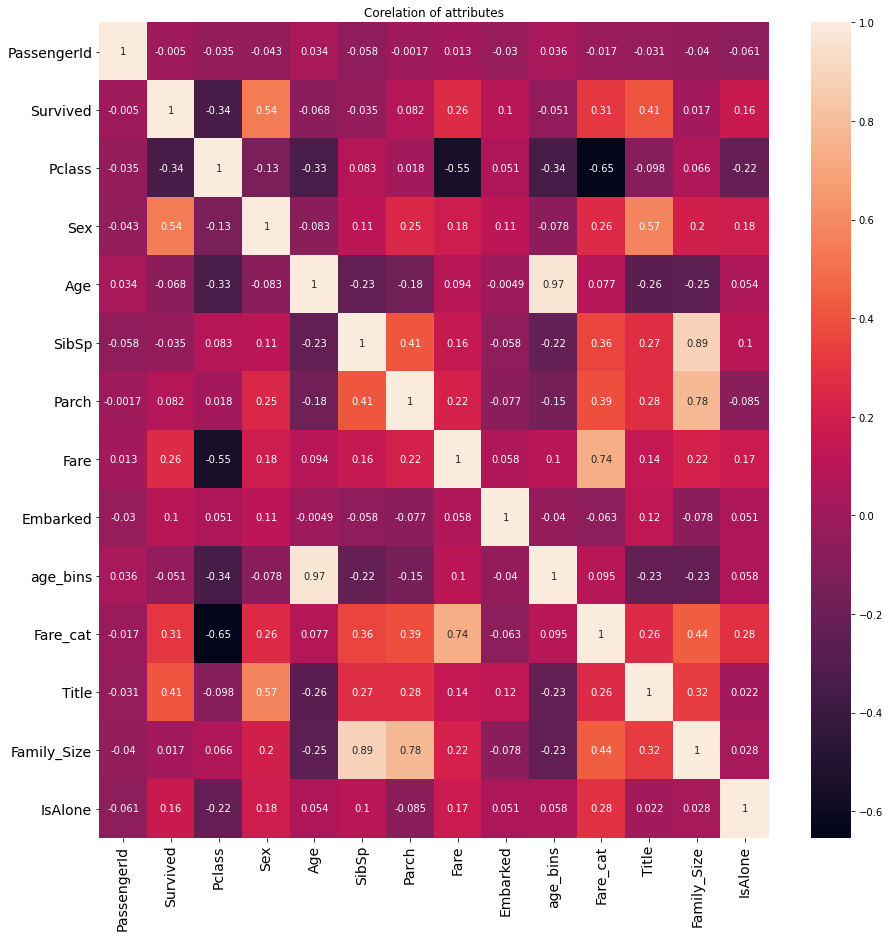

In [ ]:
#checking the correlation of all the features using heatmap for train data
sns.heatmap(train_titanic.corr(), annot=True).set_title("Corelation of attributes")
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

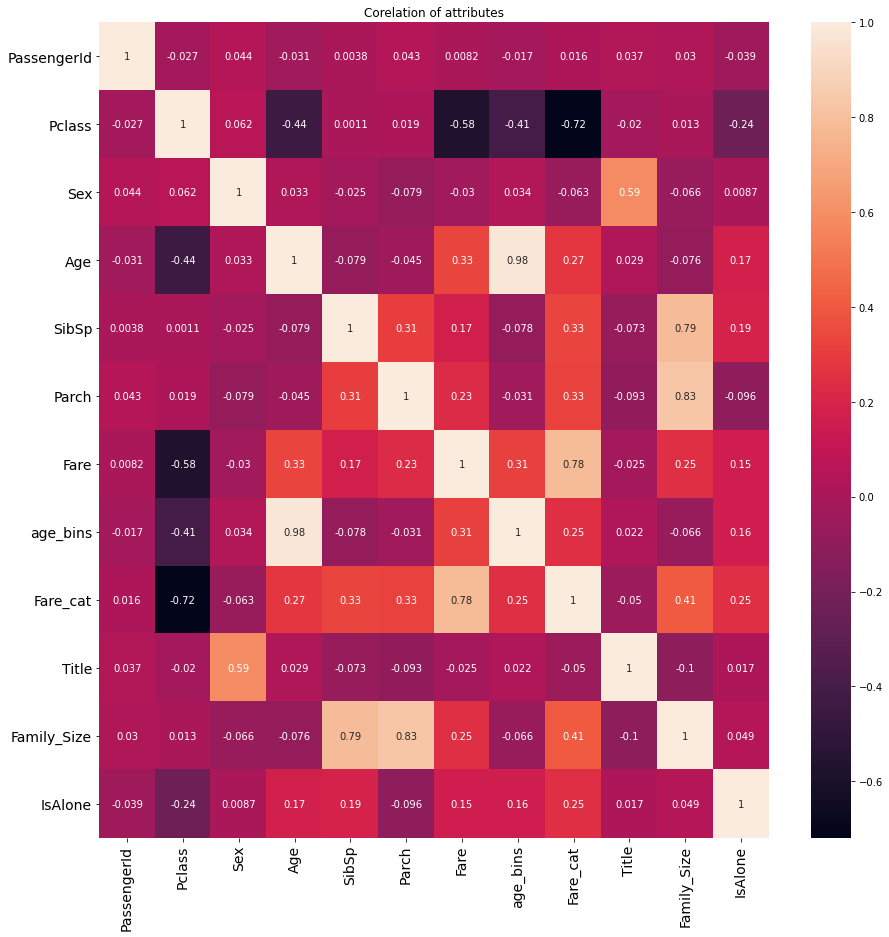

In [ ]:
#checking the correlation of all the features using heatmap for test data
sns.heatmap(test_titanic.corr(), annot=True).set_title("Corelation of attributes")
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
#feature selection using ExtraTreeClassifier
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
y = train_titanic['Survived'] 
X = train_titanic.drop(['Survived','Name','Ticket','Cabin'],axis=1) 

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=None, max_features=5,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
[0.15282242 0.08536653 0.20109316 0.11115976 0.03167612 0.02310787
 0.13475471 0.03957218 0.0607746  0.05041241 0.06639171 0.02954625
 0.01332228]
[0.01718639 0.02263224 0.05093811 0.02285349 0.01058156 0.00851276
 0.02970407 0.01041482 0.01041163 0.0086787  0.05281759 0.01277874
 0.00615361]


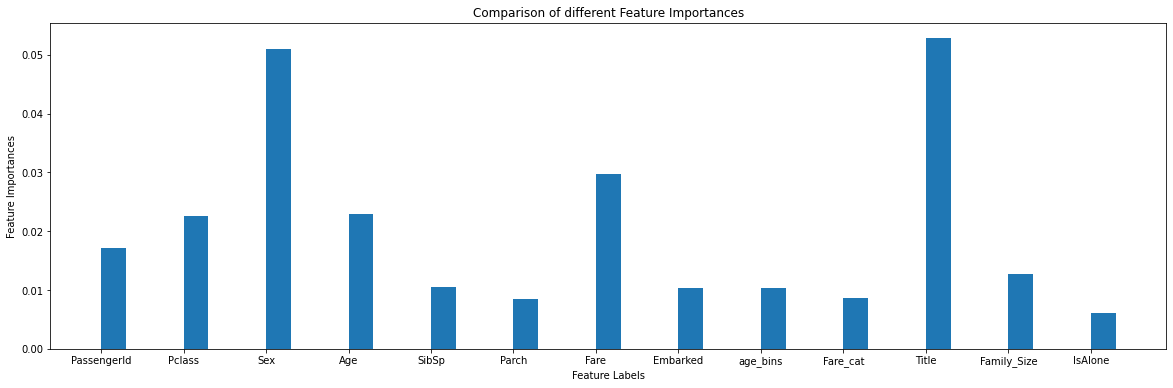

In [ ]:
# Model Building
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 5) 
  
# Train the model 
extra_tree_forest.fit(X, y) 
print(extra_tree_forest)
#  Obtaining the feature importance
feature_importance = extra_tree_forest.feature_importances_ 
print(feature_importance) 
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_], axis = 0) 
print(feature_importance_normalized)
# Plotting a Bar Graph to compare the models 
plt.figure(figsize=(20,6))
plt.bar(X.columns,feature_importance_normalized,align='edge', width=0.3) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 

plt.show() 

In [ ]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
X.shape
# Selecting two features that have highest chi-square stats
chi2_features = SelectKBest(chi2, k = 9) 
X_kbest_features = chi2_features.fit_transform(X, y) 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1])
# Visualizing the features
X_kbest_features

Original feature number: 13
Reduced feature number: 9


array([[  1.,   3.,   0., ...,   0.,   1.,   1.],
       [  2.,   1.,   1., ...,   3.,   2.,   1.],
       [  3.,   3.,   1., ...,   1.,   3.,   0.],
       ...,
       [889.,   3.,   1., ...,   2.,   3.,   0.],
       [890.,   1.,   0., ...,   2.,   1.,   0.],
       [891.,   3.,   0., ...,   0.,   1.,   0.]])

In [ ]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_bins,Fare_cat,Title,Family_Size,IsAlone
0,1,3,0,22.0,1,0,7.2500,1,2,0,1.0,1,1
1,2,1,1,38.0,1,0,71.2833,2,3,3,2.0,1,1
2,3,3,1,26.0,0,0,7.9250,1,2,1,3.0,0,0
3,4,1,1,35.0,1,0,53.1000,1,3,3,2.0,1,1
4,5,3,0,35.0,0,0,8.0500,1,3,1,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,0,27.0,0,0,13.0000,1,2,1,5.0,0,0
887,888,1,1,19.0,0,0,30.0000,1,1,2,3.0,0,0
888,889,3,1,29.0,1,2,23.4500,1,2,2,3.0,3,0
889,890,1,0,26.0,0,0,30.0000,2,2,2,1.0,0,0


In [ ]:
#importing machine learning algorithms from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
#visualizing the data
train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bins,Fare_cat,Title,Family_Size,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,1,2,0,1.0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,3,3,2.0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,1,2,1,3.0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,3,3,2.0,1,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,1,3,1,1.0,0,0


In [ ]:
#drop all the columns which are not required, add the below in the list and drop iteratively
train_titanic = train_titanic.drop("Name", axis=1)
train_titanic = train_titanic.drop("Ticket", axis=1)
train_titanic = train_titanic.drop("Cabin", axis=1)
train_titanic = train_titanic.drop("Fare", axis=1)
train_titanic = train_titanic.drop("Embarked", axis=1)
train_titanic = train_titanic.drop("IsAlone", axis=1)
train_titanic = train_titanic.drop("Parch", axis=1)
train_titanic = train_titanic.drop("age_bins", axis=1)
train_titanic = train_titanic.drop("PassengerId", axis=1)


test_titanic = test_titanic.drop("Name", axis=1)
test_titanic = test_titanic.drop("Ticket", axis=1)
test_titanic = test_titanic.drop("Cabin", axis=1)
test_titanic = test_titanic.drop("Fare", axis=1)
test_titanic = test_titanic.drop("Embarked", axis=1)
test_titanic = test_titanic.drop("IsAlone", axis=1)
test_titanic = test_titanic.drop("Parch", axis=1)
test_titanic = test_titanic.drop("age_bins", axis=1)

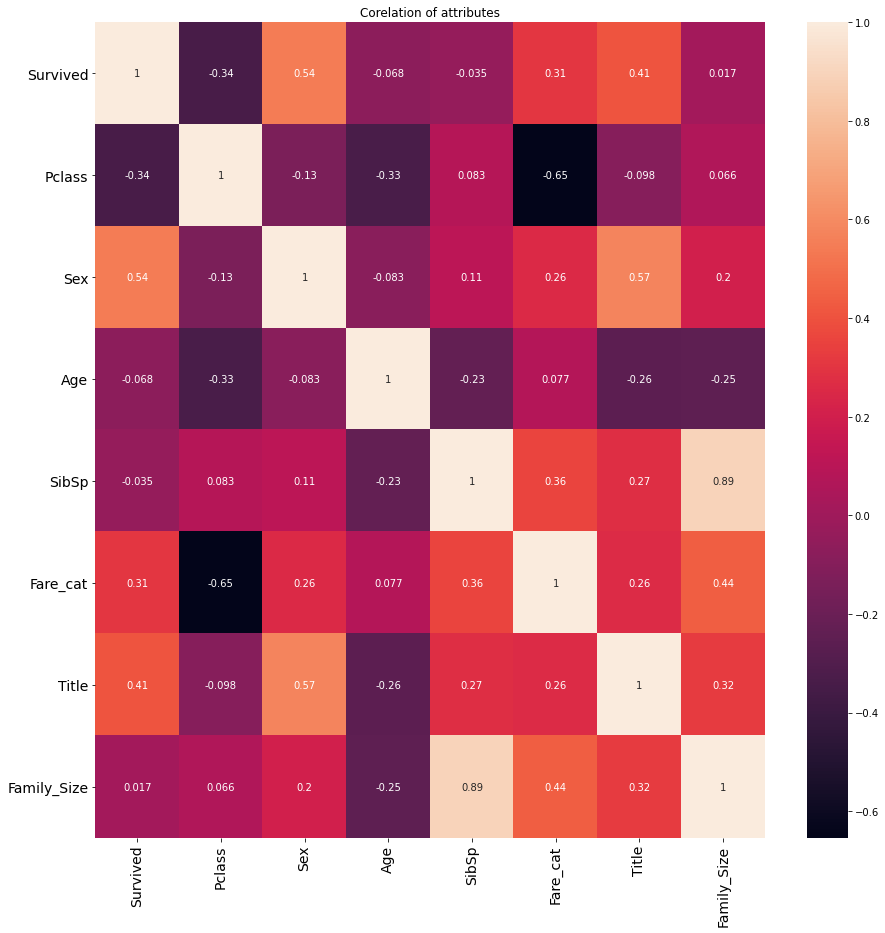

In [ ]:
#Correlation heatmap after droping unnecessary features
sns.heatmap(train_titanic.corr(), annot=True).set_title("Corelation of attributes")
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
#split the data
X_train = train_titanic.drop("Survived", axis=1)
y_train = train_titanic["Survived"]
X_test  = test_titanic.drop("PassengerId", axis=1).copy()
X_train.shape, y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [ ]:
X_test.head()

,Pclass,Sex,Age,SibSp,Fare_cat,Title,Family_Size
0,3,0,34.5,0,0,1.0,0
1,3,1,47.0,1,0,2.0,1
2,2,1,62.0,0,1,3.0,0
3,3,1,27.0,0,1,2.0,0
4,3,0,22.0,1,1,1.0,2


In [ ]:
#Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
logistic_score = round(model.score(X_train,y_train) * 100,2)
print(logistic_score)


80.81


In [ ]:
#SVM classsifier
from sklearn import svm
model = svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_svc = round(model.score(X_train, y_train) * 100, 2)
acc_svc

85.41

In [ ]:
#Linear SVC 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_l_svc = round(model.score(X_train, y_train) * 100, 2)
acc_l_svc

85.41

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


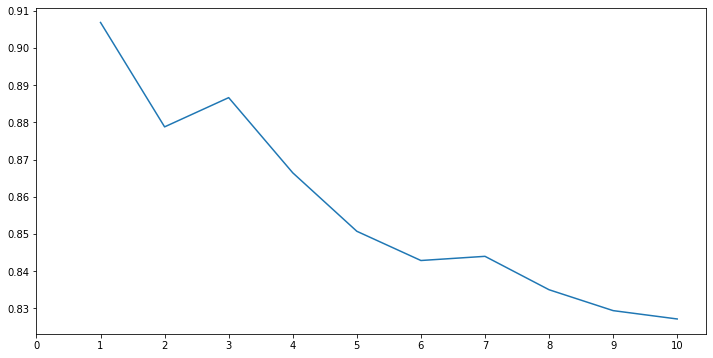

Accuracies for different values of n are: [0.90684624 0.87878788 0.88664422 0.8664422  0.85072952 0.84287318
 0.84399551 0.83501684 0.82940516 0.82716049] with the max value as  0.9068462401795735


82.72

In [ ]:
#KNN classifier, try using cross validation/ elbow
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    a=a.append(pd.Series(model.score(X_train,y_train)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())
acc_knn = round(model.score(X_train,y_train)*100,2)
acc_knn

In [ ]:
#Gaussian Naive Bayes Classifier
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc_gaus = round(model.score(X_train,y_train)*100,2)
acc_gaus

78.9

In [ ]:
#Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_dec = round(model.score(X_train, y_train) * 100, 2)
acc_dec

94.61

In [ ]:
#Feature Selection using Recursive Feature Elimination
from sklearn.feature_selection import RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
rfe.fit(X_train, y_train)
y_pred = rfe.predict(X_test)
rfe.score(X_train, y_train)
rfe_scc = round(rfe.score(X_train, y_train) * 100, 2)

for i in range(X_train.shape[1]):
    print('Column: %d, Name: %s, Selected %s, Rank: %.3f' % (i, X_train.columns[i],rfe.support_[i], rfe.ranking_[i]))

Column: 0, Name: Pclass, Selected True, Rank: 1.000
Column: 1, Name: Sex, Selected False, Rank: 2.000
Column: 2, Name: Age, Selected True, Rank: 1.000
Column: 3, Name: SibSp, Selected False, Rank: 3.000
Column: 4, Name: Fare_cat, Selected True, Rank: 1.000
Column: 5, Name: Title, Selected True, Rank: 1.000
Column: 6, Name: Family_Size, Selected True, Rank: 1.000


In [ ]:
#Random Forest Classifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_train, y_train)
acc_forest = round(model.score(X_train, y_train) * 100, 2)
acc_forest

94.5

In [ ]:
#Performing Cross Validation and Calculating the accuracy scores
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
kfold = KFold(n_splits=10, random_state=22) 
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,CV Mean,Std
Linear Svm,0.786729,0.039372
Radial Svm,0.729613,0.050173
Logistic Regression,0.801336,0.033406
KNN,0.801373,0.037116
Decision Tree,0.805955,0.045552
Naive Bayes,0.787903,0.034808
Random Forest,0.809288,0.033770


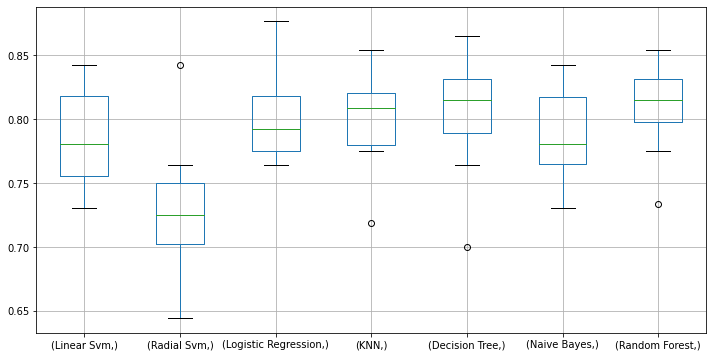

In [ ]:
# Box plots
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

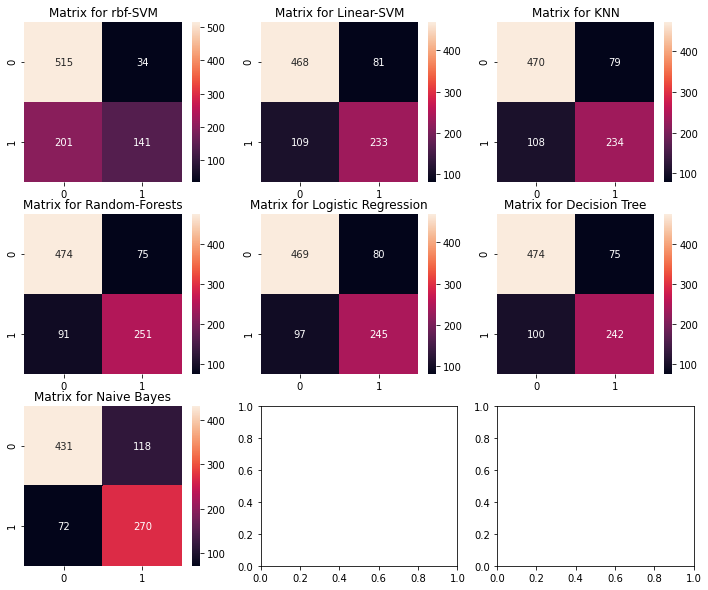

In [ ]:
#Developing the Confusion Matrix for all algorithms, use function and club classifiers into once chunk
from sklearn.metrics import confusion_matrix
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [ ]:
#Hyper-Parameter tuning using Kernel SVM
from sklearn.model_selection import GridSearchCV
C=[2,2.1,2.5]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8137279517921033
SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.4, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   37.2s finished


In [ ]:
#Hyper-parameter tuning using Random Forest Classifier
n_estimators=range(100,1000,1100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
0.8058690603226413
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished


In [ ]:
#Importing the Ensemble algorithms from sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import lightgbm as lgb

In [ ]:
#Voting Classifier
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(X_train,y_train)
print('The accuracy for ensembled model is:',round(ensemble_lin_rbf.score(X_train,y_train)*100,2))
vot = round(ensemble_lin_rbf.score(X_train,y_train)*100,2)
cross=cross_val_score(ensemble_lin_rbf,X_train,y_train, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 88.44
The cross validated score is 0.836167290886392


In [ ]:
#Performing Bagged KNN
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy for bagged KNN is:',round(model.score(X_train,y_train)*100,2))
bag_knn = round(model.score(X_train,y_train)*100,2)
result=cross_val_score(model,X_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',round(result.mean()*100,2))

The accuracy for bagged KNN is: 90.12
The cross validated score for bagged KNN is: 81.04


In [ ]:
#Performing Bagged Decision Tree
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy for bagged Decision Tree is:',round(model.score(X_train,y_train)*100,2))
bag_ran = round(model.score(X_train,y_train)*100,2)
result=cross_val_score(model,X_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',round(result.mean()*100,2))

The accuracy for bagged Decision Tree is: 94.61
The cross validated score for bagged Decision Tree is: 81.15


In [ ]:
#Ada Boost Classifier
ada = AdaBoostClassifier(random_state=1,n_estimators=2000)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
ada.score(X_train, y_train)
ada_boost = round(ada.score(X_train, y_train) * 100, 2)
ada_boost

84.62

In [ ]:
#Gradient Boosting
grad = GradientBoostingClassifier(n_estimators=2000,learning_rate=0.5,random_state=0)
grad.fit(X_train, y_train)
y_pred = grad.predict(X_test)
grad.score(X_train, y_train)
grad_boost = round(grad.score(X_train, y_train) * 100, 2)
grad_boost

94.61

In [ ]:
#Extreme Gradient Boosting
extreme = xgb.XGBClassifier(n_estimators=2000,learning_rate=0.5)
extreme.fit(X_train,y_train)
y_pred = extreme.predict(X_test)
extreme.score(X_train, y_train)
extreme_boost = round(extreme.score(X_train, y_train) * 100, 2)
extreme_boost

94.16

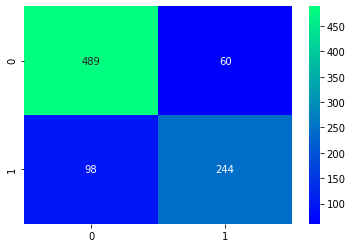

In [ ]:
#Developing the Confusion matrix of the best model
xgb=XGBClassifier(n_estimators=1000,random_state=0,learning_rate=0.01)
result=cross_val_predict(xgb,X_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

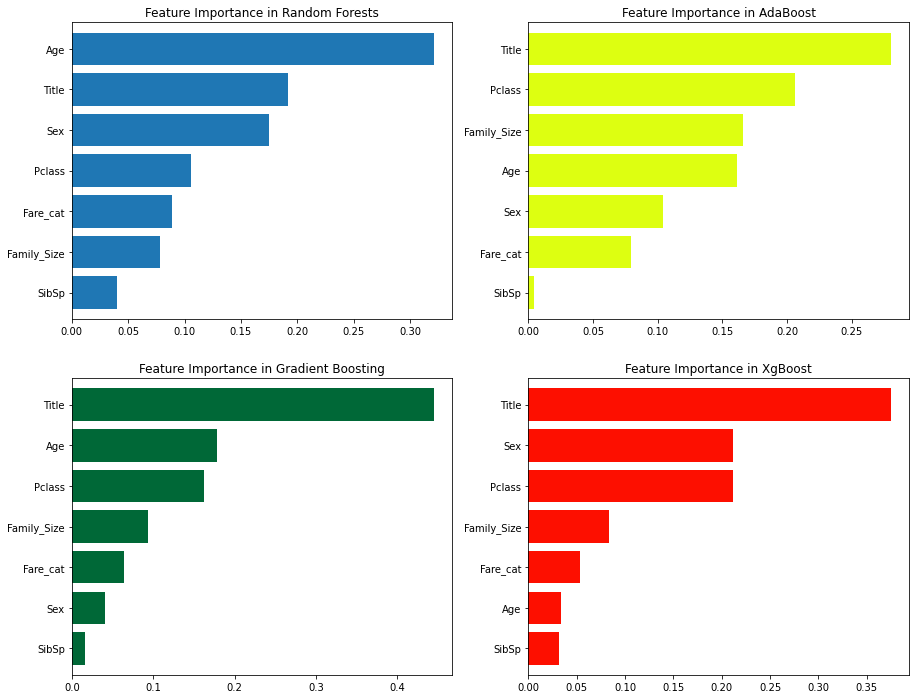

In [ ]:
#Visualizing the Feature Importance
import xgboost as xgb
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=1000,random_state=0)
model.fit(X_train,y_train)
pd.Series(model.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(n_estimators=1000,learning_rate=0.01,random_state=0)
model.fit(X_train,y_train)
pd.Series(model.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=1000,learning_rate=0.1,random_state=0)
model.fit(X_train,y_train)
pd.Series(model.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=xgb.XGBClassifier(n_estimators=1000,learning_rate=0.1)
#extreme = xgb.XGBClassifier(n_estimators=1000,learning_rate=0.1)
model.fit(X_train,y_train)
pd.Series(model.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

In [ ]:
#Saving into CSV file
submission = pd.DataFrame({"PassengerId": test_titanic["PassengerId"],"Survived": y_pred})
submission
submission.to_csv('submission.csv',index=False)

In [ ]:
#Model Performace scores
models = pd.DataFrame({'Model': ['Radial SVC', 'KNN', 'Logistic Regression','Random Forest', 'Naive Bayes', 'Linear SVC', 'Decision Tree','VotingClassifier','Bagged KNN','Bagged DecisionTree','AdaBoost','GradientBoost','XGBoost'],
    'Score': [acc_svc, acc_knn, logistic_score,acc_forest, acc_gaus, acc_l_svc, acc_dec,vot,bag_knn,bag_ran,ada_boost,grad_boost,extreme_boost]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,Decision Tree,94.61
9,Bagged DecisionTree,94.61
11,GradientBoost,94.61
3,Random Forest,94.50
12,XGBoost,94.16
8,Bagged KNN,90.12
7,VotingClassifier,88.44
0,Radial SVC,85.41
5,Linear SVC,85.41
10,AdaBoost,84.62
